# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [1]:

from google.colab import drive
#imports drive library from the module of the google.colab
# drive library represents some functions for working with Google Drive in a Google Colab Notebook
drive.mount('/content/drive',force_remount=True)   # mounts the Google Drive to the Google Colab runtime virtual file system
# That mounting creates a link between Google Drive and Google Colab environment
# Therefore, we can access the files which are stored in the Google Drive directly from Google Colab environment

!ls /content/drive/MyDrive/  # running that command will display a list of files and directories in the specified directory
!cp -r /content/drive/MyDrive/dataset.zip ./
# '/content/drive' represents the point of the mount that is a directory path in the Google Colab runtime
# thus, we can access to the some data of the Google Drive under the '/content/drive' directory

#'!cp -r' command copies the file 'dataset.zip' from the specified Google Drive location
#to the current working directory(represented by './')
# '-r' indicates that to copy the entire directory sturcture if 'dataset.zip' is a folder. Otherwise it is ignored

!unzip dataset.zip
#unzips the 'dataset.zip' file which was copied to the current working directory
# this assumes the unzip tool is suitable on the Google Colab runtime


Mounted at /content/drive
 Classroom	 'Oğuz Kağan Koçak Gantt Chart.gsheet'			'Task 3.1.1.gdoc'
 ColabNotebooks  'Oğuz Kağan Koçak Task 1.2.1.gsheet'
 dataset.zip	 'PROJECT DOCUMENTATION AND ROADMAP FOR TASK 4.1.gdoc'
Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
   creating: dataset/scenes/
  inflating: __MACOSX/dataset/._scenes  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/models/
  inflating: __MACOSX/dataset/._models  
  inflating: dataset/scenes/scene12.png  
  inflating: __MACOSX/dataset/scenes/._scene12.png  
  inflating: dataset/scenes/scene10.png  
  inflating: __MACOSX/dataset/scenes/._scene10.png  
  inflating: dataset/scenes/scene11.png  
  inflating: __MACOSX/dataset/scenes/._scene11.png  
  inflating: dataset/scenes/scene5.png  
  inflating: __MACOSX/dataset/scenes/._scene5.png  
  inflating: dataset/scenes/scene4.png  
  inflating: __MACOSX/dataset/scenes/._scene4.png  
 

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

In [2]:
!pwd

/content


[[140 207 234]
 [140 207 234]
 [172 238 255]
 ...
 [153 213 249]
 [124 168 204]
 [124 168 204]]
Original image: 


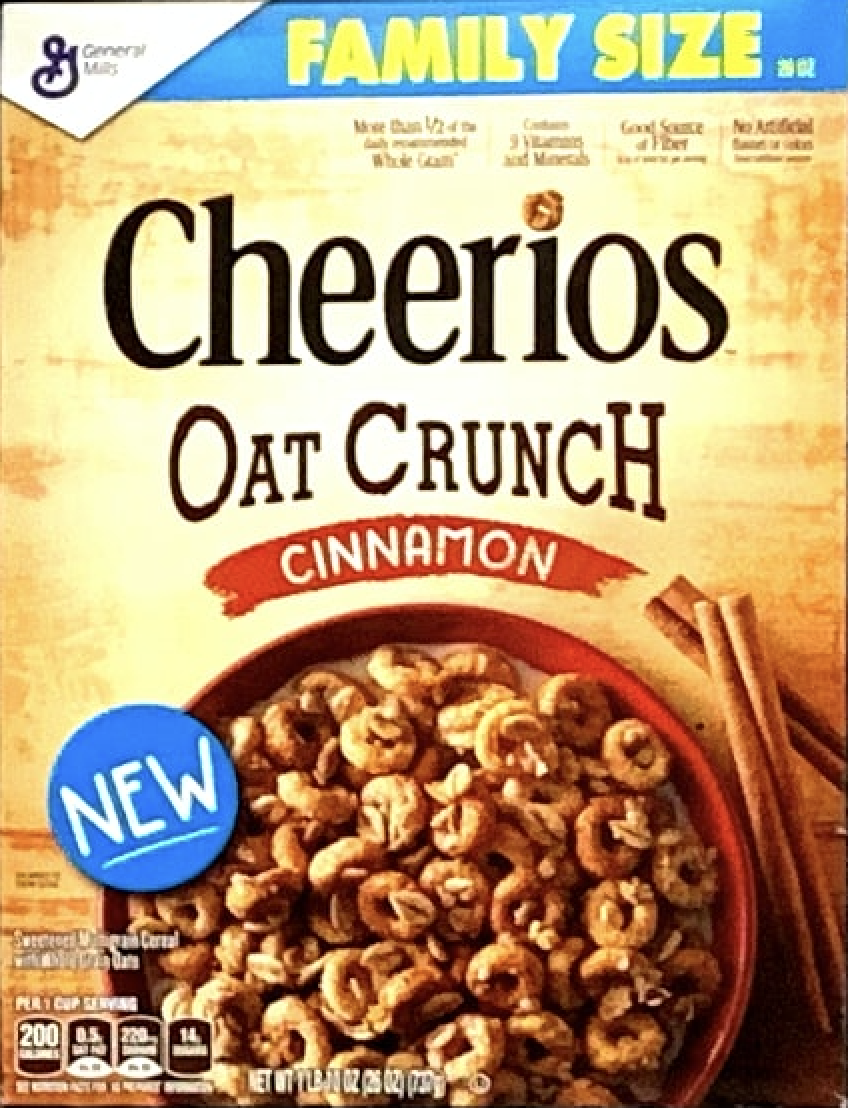

Resized and normalized image: 


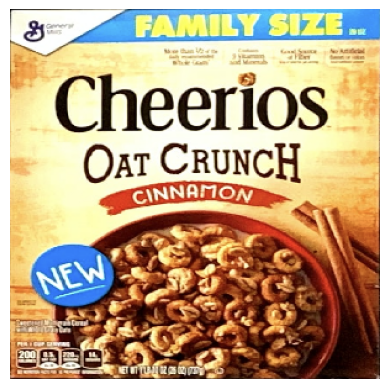

In [3]:
import cv2 # imports the OpenCV library, that is a computer vision library used for many tasks of image processing
import numpy as np # imports the NumPy library, that is used for numerical computations
import matplotlib.pyplot as plt # imports the pyplot module from the matplotlib library for using visualizations and plotting
from google.colab.patches import cv2_imshow # that function is used to display the original image from the corresponding numpy array


#last part, we copied the dataset.zip file to the current working directory(/content), then unzipped that file
# therefore, we write the correct path to read the 'ref1.png' image
image = cv2.imread('dataset/models/ref1.png') # reads an image file named 'fruit_image.jpg' from the current directory using OpenCV's imread() function
# the image is loaded as a NumPy array
# this image has BGR format in its numpy array

print(image[360])
# if the BGR or RGB values are very close to each other, the corresponding color converges to the white color
# there are some historical reasons for the adoption of BGR in computer vision and image processing
# Actually, RGB is more intutive for perception of human and suitable with in web development and graphic design



print("=======================================================")
resized_image = cv2.resize(image, (300,300)) # resizes the original image to a new size of 300x300 pixels using OpenCV's resize() function
# the resized image is stored in the 'resized_image' variable
# there are more than 1 interpolation methods for resizing function in OpenCV library
# the method is 'cv2.INTER_LINEAR', which corresponds to bilinear interpolation.
# that interpolation computes the new pixel value based on a weighted average of the 4 nearest pixels in the input image
# that method is efficient for resizing images

plt.imshow(cv2. cvtColor(resized_image, cv2.COLOR_BGR2RGB))
# displays image using Matplotlib's 'imshow()' function
# the image's color channels are converted from BGR(default format used by OpenCV) to RGB with cv2.cvtColor()
# Matplotlib expects images in RGB format



plt.axis('off') # turns off the axis in the plot, removing the axis labels




normalized_image = resized_image.astype(np.float32) / 255.0
# normalizes the pixel values of the resized image to the range [0,1]
# the image is translated to type float32 of NumPy array by astype() function
# each pixel value is divided by 255.0 to scale them down to the [0,1] range

print("Original image: ")
cv2_imshow(image) # displaying the original image from the corresponding numpy array

print('Resized and normalized image: ')
#cv2_imshow(normalized_image)

# normalized_image is a BGR format with numpy arrays, therfore, first, we should convert it to the RGB format, then, corresponding image format to display
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))

# plt.imshow() function is to display the image
# cv2.cvtColor() function convert the BGR format image to RGB format image because RGB format is necessary for the plt.imshow() function

cv2.waitKey(0) # wait indefinetly until a key is pressed
cv2.destroyAllWindows() #close all windows of OpenCV when the program has finished executing





In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator library is for image augmentation
# cv2 library is for reading and preprocessing images
# numpy library is for numerical operations
# matplotlib.pyplot library is for plotting images


generateData= ImageDataGenerator( #creating ImageDataGenerator object named 'generateData' various augmentation parameters

    rotation_range = 15, # randomly rotation of images by up to 15 degrees
    brightness_range = (0.7,1.2), # randomly set brightness  between 0.7 and 1.2
    height_shift_range = 0.15, # randomly shift images vertically by up to %15 of the image height
    width_shift_range = 0.15, # randomly shift images horizontally by up to %15 of the image width
    horizontal_flip = True # randomly flip images horizontally
# all of these parameters decide on if their values of rotation, brightness, height shift, width shift ranges change for the each images in the dataset

)

In [5]:
image2 = cv2.imread('dataset/models/ref1.png')
 # this imread function convert the image to corresponding numpy array according to BGR order

image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
 # image2 numpy array with BGR format is converted to the RGB format by using cvtColor function from the cv2 library

In [6]:
import numpy as np
image2 = np.expand_dims(image2, axis=0)

# let's assume that, we have RGB image with (height, width, channels) = (200, 300, 3)
# channels means that, different components of color information in the each pixel of the image (Red, Green, Blue)
# np.expand_dims(image2, axis=0) means that, resulting array will have dimensions which are (sizeOfBatch, height, width, channels) = (1, 200, 300, 3)
# where the sizeOfBatch = 1, indicates that, there is only 1 image in the batch
# flow() function of ImageDataGenerator expects input in that format



In [7]:
imagesAugmented = generateData.flow(image2)
# generating augmented images using the function of flow which is the function of the generateData object
# steps parameter means that, number of the total batches of the images before stopping



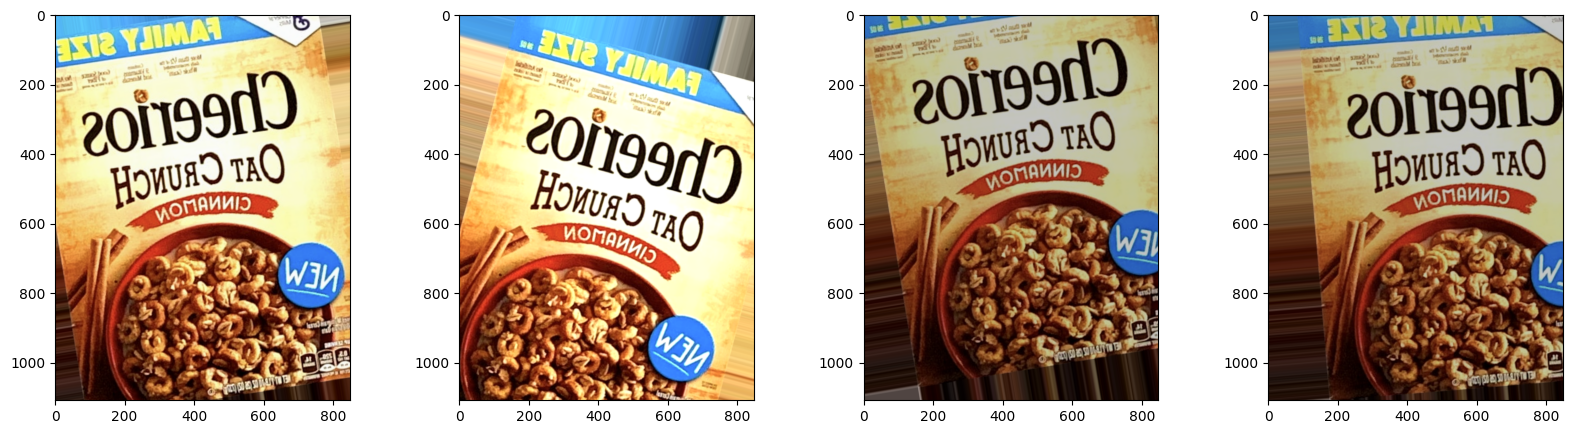

In [8]:
figure, gridOfSubplots = plt.subplots(1,4, figsize=(20, 5))

# subplots function creates a figure and grid of subplots with 4 columns and 1 row
# figsize=(20,5) parameter determines the each figure's size, where the height is 5, width is 20 inches

type(imagesAugmented.next()[0])

for i in range(4):  # iterating over 4 times to display images which are augmented
# 4 is the batch size (number of images to display)


  each_imageAugmented = imagesAugmented.next()[0].astype(np.uint8)

  # imagesAugmented.next() generates the next augmented images's batch
  # in each call of next function, will return the next augmented image (batch)
  # [0] is for selecting the first element of the augmented images(batch)
  # at the same time, each batch contains both images and corresponding labels
  # astype(np.uint8) converts the image's pixel values to unsigned 8 bit integers because that is the standard format for displaying image
  # if the image was loaded using cv2.imread() function, the pixel values are represented as unsigned 8 bit integers

  # cv2.imread() function reads images as BGR(blue, green, red) format and stores these pixel values as unsigned 8 bit integers

  gridOfSubplots[i].imshow(each_imageAugmented)
  # displays the batch(augmented image) on the th of  "i" subplot




In [9]:
!pwd # printing the current working directory (content) in Google Colab

!ls # to list the contents of the directory




/content
dataset  dataset.zip  drive  __MACOSX  sample_data


In [10]:
!ls /content/drive/MyDrive/ColabNotebooks

animalsClassification.ipynb  detectHandWriting.ipynb  Untitled
assignment_module_one.ipynb  lab_session_1.ipynb      Untitled0.ipynb


In [11]:
!cp /content/drive/MyDrive/ColabNotebooks/assignment_module_one.ipynb /content/IPCVAssignment1
# to copy the assignment_module_one.ipynb file from the corresponding path to the /content/IPCVAssignment1 directory

In [12]:
!ls /content/IPCVAssignment1/ #to list the contents

ls: cannot access '/content/IPCVAssignment1/': Not a directory


In [13]:
%cd /content/IPCVAssignment1


[Errno 20] Not a directory: '/content/IPCVAssignment1'
/content


In [14]:
!pip install opencv-python-headless==4.5.5.64


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80



by installing that, we are setting up the necessary image processing capabilities in our Google Colab environment to work on that project
 headless version is smaller in size and does not have any GUI dependencies (Google Colab do not require a graphical user interface)
 GUI is a user interface type which allows users to interact with electronic devices by visual indicators and graphical icons instead of command-line prompts or text-based interfaces

In [15]:
!pip install tensorflow
!pip install matplotlib


- ! indicates that to allowing to run shell commands directly from the notebook cells
- !pip install command is to install Python packages from the Python Package Index (PYPI)
- to install Tensorflow library which is for ML- powered applications
- to install Matplotlib which is a plotting library for the Python programming language

In [16]:
import tensorflow as tf
from tensorflow import keras

- importing libraries from the installed packages to use in this project
- Keras is an API for minimizing the number of user actions required for common cases, which is also ensures clear feedback upon user error.

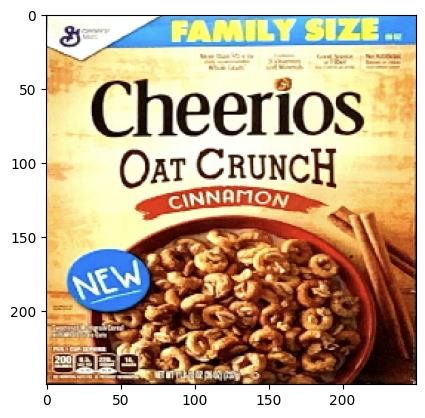

In [17]:
def imagePreprocess(pathOfImage):
  image = cv2.imread(pathOfImage, cv2.IMREAD_COLOR)
  # to read the image from the specified file path using the 'cv2.IMREAD_COLOR' function
  # to clarify each pixel's BGR(default color format used by OpenCV) values
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # to convert the image from BGR to RGB color format which is used by most other libraries like tensorflow and matplotlib
  # thus, the image colors are displayed with correct values of the corresponding image values
  imageResized = cv2.resize(image, (250,250))  # to resize the image as 250x250 pixels
  # this function is significant for batch processing in machine learning models
  imageNormalized = imageResized.astype(np.float32) / 255.0
  # this code line provides basic representation of the corresponding color values for each pixel
  return imageNormalized

imagePreprocessing = imagePreprocess('dataset/models/ref1.png')
# to preprocess for a picture using with imagePreprocess function
plt.imshow(imagePreprocessing) # to show the colorful image of the  corresponding normalized pixel values
plt.axis('on')
plt.show()

In [18]:
from tensorflow.keras.applications import VGG16
# VGG16(develooped by Visual Geometry Group,
# 16 refers to the number of layers with trainable parameters such as convolutional and fully connected layers)
# which is pre-trained Convolutional Neural Network arhitecture from the keras module
# that architecture consists of 16 layers which include convolutional layers, fully connected layers and pooling layers

from tensorflow.keras.models import Model
# Model is to create a new model based on the pre-trained VGG16 model

modelDefault =VGG16(weights = 'imagenet', include_top=False, input_shape=(250,250,3))
#  weights = 'imagenet' means that, the model should load pre-trained weights
# imagesnet refers to the large dataset used to train this model
# contains millions of images related to the many categories
# the model can leverage the knowledge it gained from the imagenet to be beneficial for various image proessing tasks using these pre-trained weights
# even dataset is small

# include_top=False, top means that, the final fully connected layers of the model that are used for classification
# above code exclude these layers, this is not beneficial for VGG16's original classification aim but is beneficial for feature extractor ,
# this code is beneficial for adding own custom layers on top of the VGG16 model to the specific task
# input_shape=(250,250,3) represents that, 250 pixels for height, 250 pixels for width and 3 pixels for Red, Green and Blue color channels

featurExtractor = Model(inputs=modelDefault.input, outputs=modelDefault.get_layer('block5_conv3').output)
# Model() function allows to create a new model from the Keras library
# inputs = modelDefault.input means that, the input of this new model is the same with the input of the original VGG16 model which is (250,250,3)
# outputs = modelDefault.get_layer('block5_conv3').output means that, the output of the this new model is the output of the layer named 'block5_conv3' in the VGG16 model
# this layer is a convolutional layer towards the end of the network, capturing high-level features of the image
# layers which are closer to the input capture low-level features(like textures and edges)
# layers which are deeper layers (like 'block5_conv3) capture high-level features(lke objects and shapes)
# 'block5_conv3' has more information. Therefore, it is useful for image recognition and object detection tasks
# output means that, output of the 'block5_conv3' layer feature map

def featurExtracting(imageArr): # imageArr is preprocessed(transformed to RGB color ) and normalized ([0-1] range) image
  imageArr = np.expand_dims(imageArr,axis=0) # to transform the shape to (1,250,250,3),  1 indicates that, there is 1 image in this batch
  return featurExtractor.predict(imageArr) # predict method of the model takes the batch of the images, processes them to extract feature maps from the input

extractedFeatures = featurExtracting(imagePreprocessing)
print(extractedFeatures.shape)





1/1 [==============================] - 1s 992ms/step
(1, 15, 15, 512)


- FEATURE EXTRACTION BY CNN
- (1, 15, 15, 512)  means that,
- 1  is the batch size, because we are processing 1 image at a time
- 15,15 are spatial dimensions of the extracted feature map
- we resized the input image to the 250x250 pixels, then, when we reach to the 'block5_conv3' convolutional layer, the spatial dimensions become 15x15 pixels
- 512 is the number of VGG16 model filters(feature map channels)



In [ ]:
def matchingOfObjectInScene(featuresScene,featuresObject):
  # featuresScene specifies of the larger image(scene image which has multiple instances)
  # featuresObject specifies of the smaller image(instance image), we try to find this instance from the scene
  cv2.matchTemplate(featuresScene, featuresObject, cv2.TM_CCOEFF_NORMED)
  # cv2.matchTemplate used for instance matching, this function slides template image over the scene image
  #
